# Google Colab 데이터 로드

In [ ]:
#Step 1.분석할 데이터가 저장된 파일을 불러와서 변수에 할당합니다.
from google.colab import files
myfile = files.upload()
import io
import pandas as pd
#pd.read_csv로 csv파일 불러오기
fish = pd.read_csv(io.BytesIO(myfile['fish_perch3.csv']) )
fish

# 로컬 데이터 로드

In [10]:
#컴퓨터에서 작업하려면 아래 코드의 주석을 제거하고 실행하면 됩니다
import pandas as pd
fish = pd.read_csv('./머신러닝실습용자료/fish_perch3.csv',encoding='cp949')
fish

,Species,Weight,Length
0,Perch,5.9,8.4
1,Perch,32.0,13.7
2,Perch,40.0,15.0
3,Perch,51.5,16.2
4,Perch,70.0,17.4
5,Perch,100.0,18.0
6,Perch,78.0,18.7
7,Perch,80.0,19.0
8,Perch,85.0,19.6
9,Perch,85.0,20.0


# 공통 실습 코드

In [11]:
#Step 2: 훈련용 데이터셋과 테스트용 데이터셋 나누어서 분석
from sklearn.model_selection import train_test_split

# data, target 정의
data = fish['Length']
target = fish['Weight']

# train, test 데이터 분리
train_data, test_data, train_target, test_target = train_test_split(
    data, target, test_size=0.2, random_state=10)

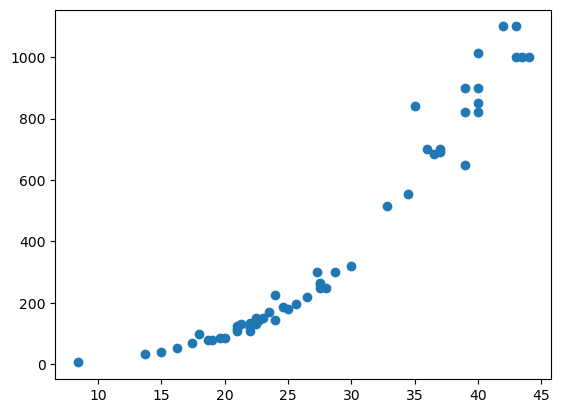

In [12]:
# Step 3. 단순회귀인지 다항회귀인지 그래프로 산포도 확인
import matplotlib.pyplot as plt
plt.plot(data,target,'o')
plt.show()

In [13]:
#Step 4. 데이터 값을 제곱한 컬럼을 추가합니다
import numpy as np
train_data_new = np.column_stack((train_data**2, train_data))
test_data_new = np.column_stack((test_data**2, test_data))
print(train_data_new.shape , test_data_new.shape)

(44, 2) (12, 2)


In [14]:
#Step 5. 분석하고 예측합니다
# 선형회귀 모델 학습
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_data_new,train_target)

# 예측
print(lr.predict([[50**2,50]]))

[1545.82663253]


In [15]:
#계수와 절편 값 확인하기
print(lr.coef_ , lr.intercept_)

[  0.98621387 -20.59306723] 109.94532334020477


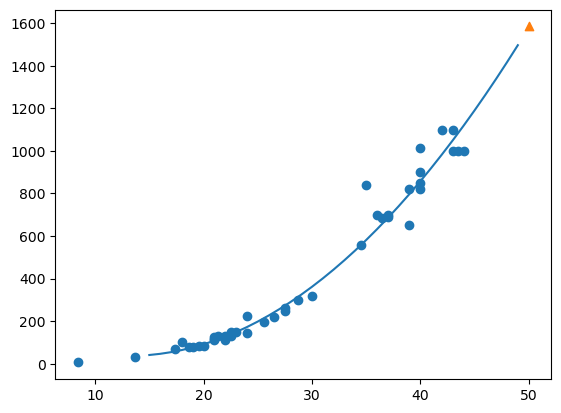

In [16]:
#그래프로 시각화합니다
p = np.arange(15,50)

#훈련 데이터의 분포를 그립니다.
import matplotlib.pyplot as plt
plt.scatter(train_data , train_target)
plt.plot(p , 1.13 * p ** 2 - 29.5 * p + 229.3)

#찾는 데이터
plt.scatter([50] , [1584.9] , marker='^')
plt.show()

In [17]:
# 모델의 성능 평가
print(lr.score(train_data_new , train_target))
print(lr.score(test_data_new , test_target))

0.971115050581039
0.975914125359401
